# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and Setup
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key
from api_keys import g_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.00, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
API_URL_base = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{API_URL_base}appid={weather_api_key}&units={units}&q="

#Establish list variables
city_name_lst = []
cloudiness_lst = []
country_lst = []
date_lst =[]
humidity_lst = []
lat_lst =[]
lng_lst = []
max_temp_lst = []
wind_spd_lst = []
index_ctr = 0
set_ctr = 1

print("Starting Data Retrieval")
print("________________________")

#Loop through data
for index, city in enumerate(cities, start = 1):
    try:
        weather_response = requests.get(query_url + city).json()
        city_name_lst.append(weather_response["name"])
        cloudiness_lst.append(weather_response["clouds"]["all"])
        country_lst.append(weather_response["sys"]["country"])
        date_lst.append(weather_response["dt"])
        humidity_lst.append(weather_response["main"]["humidity"])
        lat_lst.append(weather_response["coord"]["lat"])
        lng_lst.append(weather_response["coord"]["lon"])
        max_temp_lst.append(weather_response['main']['temp_max'])
        wind_spd_lst.append(weather_response["wind"]["speed"])
        if index_ctr > 49:
            index_ctr = 0
            set_ctr = set_ctr + 1
    
        else:
            index_ctr = index_ctr + 1
            
        print(f"Processing Record {index_ctr} of Set {set_ctr} : {city}") 
  
    except(KeyError, IndexError):
        print(f"City not found. Skipping... {city}")
        
print("__________________________")
print("Data Retrieval Complete ")    


Starting Data Retrieval
________________________
City not found. Skipping... rungata
Processing Record 1 of Set 1 : ilulissat
Processing Record 2 of Set 1 : nikolskoye
City not found. Skipping... ngukurr
Processing Record 3 of Set 1 : atherton
Processing Record 4 of Set 1 : butaritari
Processing Record 5 of Set 1 : punta arenas
Processing Record 6 of Set 1 : bairiki
Processing Record 7 of Set 1 : georgetown
Processing Record 8 of Set 1 : avarua
Processing Record 9 of Set 1 : bengkulu
Processing Record 10 of Set 1 : kaitangata
Processing Record 11 of Set 1 : mataura
City not found. Skipping... tsihombe
Processing Record 12 of Set 1 : tuatapere
Processing Record 13 of Set 1 : bandarbeyla
Processing Record 14 of Set 1 : sao filipe
Processing Record 15 of Set 1 : cherskiy
Processing Record 16 of Set 1 : marsa matruh
Processing Record 17 of Set 1 : victoria
Processing Record 18 of Set 1 : ushuaia
Processing Record 19 of Set 1 : cidreira
Processing Record 20 of Set 1 : rikitea
Processing Rec

Processing Record 28 of Set 4 : naucalpan
Processing Record 29 of Set 4 : pauini
Processing Record 30 of Set 4 : bilibino
Processing Record 31 of Set 4 : waipawa
Processing Record 32 of Set 4 : cururupu
Processing Record 33 of Set 4 : thunder bay
Processing Record 34 of Set 4 : ukiah
Processing Record 35 of Set 4 : saskylakh
Processing Record 36 of Set 4 : honiara
Processing Record 37 of Set 4 : grindavik
Processing Record 38 of Set 4 : natal
Processing Record 39 of Set 4 : matagalpa
Processing Record 40 of Set 4 : guerrero negro
Processing Record 41 of Set 4 : velizh
Processing Record 42 of Set 4 : benguela
Processing Record 43 of Set 4 : kruisfontein
Processing Record 44 of Set 4 : aykhal
Processing Record 45 of Set 4 : pisco
Processing Record 46 of Set 4 : whitehorse
Processing Record 47 of Set 4 : xinqing
Processing Record 48 of Set 4 : barcelos
Processing Record 49 of Set 4 : castro
Processing Record 50 of Set 4 : lukuledi
Processing Record 0 of Set 5 : asau
Processing Record 1 of

Processing Record 10 of Set 8 : balabac
Processing Record 11 of Set 8 : kaa-khem
Processing Record 12 of Set 8 : krasnyy chikoy
Processing Record 13 of Set 8 : eydhafushi
Processing Record 14 of Set 8 : utete
Processing Record 15 of Set 8 : floro
Processing Record 16 of Set 8 : iquitos
Processing Record 17 of Set 8 : evensk
Processing Record 18 of Set 8 : north platte
City not found. Skipping... daxian
Processing Record 19 of Set 8 : ust-kuyga
Processing Record 20 of Set 8 : ucluelet
Processing Record 21 of Set 8 : bria
City not found. Skipping... huazolotitlan
Processing Record 22 of Set 8 : yulara
Processing Record 23 of Set 8 : aksarka
City not found. Skipping... karaul
Processing Record 24 of Set 8 : atar
Processing Record 25 of Set 8 : kalmunai
Processing Record 26 of Set 8 : barranca
Processing Record 27 of Set 8 : izhma
Processing Record 28 of Set 8 : yeppoon
Processing Record 29 of Set 8 : magistralnyy
Processing Record 30 of Set 8 : camocim
Processing Record 31 of Set 8 : rich

Processing Record 39 of Set 11 : ossora
Processing Record 40 of Set 11 : lumeje
Processing Record 41 of Set 11 : fukue
Processing Record 42 of Set 11 : mahibadhoo
Processing Record 43 of Set 11 : sao gabriel da cachoeira
Processing Record 44 of Set 11 : gornji milanovac
Processing Record 45 of Set 11 : ferrol
__________________________
Data Retrieval Complete 


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#Create DataFrame
weather_df = pd.DataFrame({
    "City": city_name_lst,
    "Cloudiness": cloudiness_lst,
    "Country":country_lst,
    "Date":date_lst,
    "Humidity":humidity_lst,
    "Lat":lat_lst,
    "Lng":lng_lst,
    "Max Temp (F)":max_temp_lst,
    "Wind Speed (mph)":wind_spd_lst
    
})

weather_df.count()


City                555
Cloudiness          555
Country             555
Date                555
Humidity            555
Lat                 555
Lng                 555
Max Temp (F)        555
Wind Speed (mph)    555
dtype: int64

In [6]:
#Display DataFrame
weather_df


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp (F),Wind Speed (mph)
0,Ilulissat,0,GL,1612929502,45,69.2167,-51.1000,17.60,4.61
1,Nikolskoye,20,RU,1612929729,77,59.7035,30.7861,1.99,2.24
2,Atherton,13,GB,1612929721,60,53.5237,-2.4935,30.00,1.99
3,Butaritari,100,KI,1612929729,82,3.0707,172.7902,81.75,17.43
4,Punta Arenas,75,CL,1612929696,72,-53.1500,-70.9167,59.00,4.61
...,...,...,...,...,...,...,...,...,...
550,Fukuechō,75,JP,1612929816,54,32.6881,128.8419,55.40,8.05
551,Mahibadhoo,58,MV,1612929667,74,3.7833,72.9667,80.98,13.22
552,São Gabriel da Cachoeira,100,BR,1612929816,96,-0.1303,-67.0892,74.70,0.22
553,Gornji Milanovac,0,RS,1612929816,100,44.0333,20.4500,35.60,1.14


In [7]:
#Save data into CSV
weather_df.to_csv("output_data/cities1.csv", index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#  Get the indices of cities that have humidity over 100%.


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

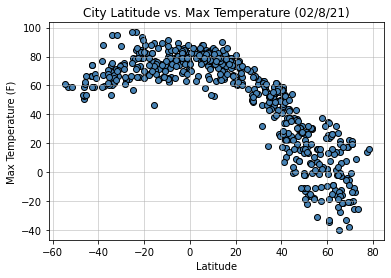

In [10]:
plt.scatter(weather_df["Lat"], weather_df["Max Temp (F)"], facecolor = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Max Temperature (02/8/21)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)


In [11]:
# Save figure as .png file
plt.savefig("output_data/City Latitude vs Max Temperature.png")

<Figure size 432x288 with 0 Axes>

## Latitude vs. Humidity Plot

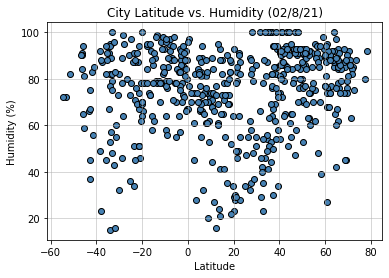

In [12]:
plt.scatter(weather_df["Lat"], weather_df["Humidity"], facecolor = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Humidity (02/8/21)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)


In [13]:
# Save figure as .png file
plt.savefig("output_data/City Latitude vs Humidity.png")

<Figure size 432x288 with 0 Axes>

## Latitude vs. Cloudiness Plot

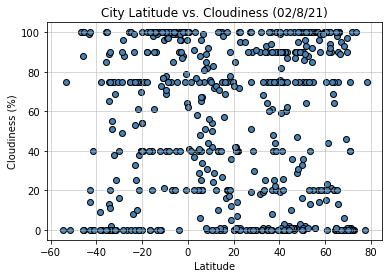

In [14]:
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], facecolor = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Cloudiness (02/8/21)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

In [15]:
# Save figure as .png file
plt.savefig("output_data/City Latitude vs Cloudiness.png")

<Figure size 432x288 with 0 Axes>

## Latitude vs. Wind Speed Plot

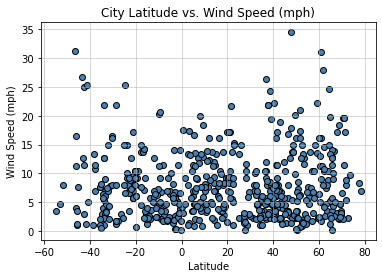

In [16]:
plt.scatter(weather_df["Lat"], weather_df["Wind Speed (mph)"], facecolor = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Wind Speed (mph)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

In [17]:
# Save figure as .png file
plt.savefig("output_data/City Latitude vs Wind Speed.png")

<Figure size 432x288 with 0 Axes>

## Linear Regression

In [18]:
#separate the plots into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude)
north_hemi = weather_df.loc[weather_df["Lat"] >= 0]
south_hemi = weather_df.loc[weather_df["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = -1.44x + 93.52
The r-squared is: -0.8885103601206907
The regression reflects a negative correlation.
The temprature decreases in the northern hemisphere as you move away from the equator.


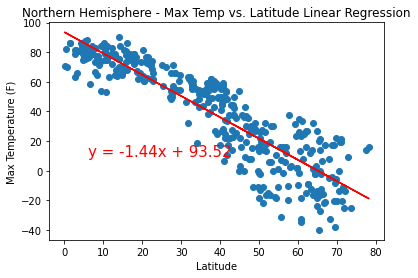

In [24]:
x_val = pd.to_numeric(north_hemi["Lat"]).astype(float)
y_val = pd.to_numeric(north_hemi["Max Temp (F)"]).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"Regression line equation is: {line_eq}")

plt.scatter(x_val,y_val)
plt.plot(x_val,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression reflects a negative correlation.")
print("The temprature decreases in the northern hemisphere as you move away from the equator.")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression